# Sentiment analysis using natural language processing 
# IMDb movie reviews

## Table of Contents

1.  [Introduction](#1)

2.  [Data](#2)

3.  [Methodology](#3)

4.  [Analysis](#4)

5.  [Results and Discussion](#5)

6.  [Conclusion](#6)

7.  [References](#7)


## Introduction  <a id= "1"></a>


Sentiment analysis, also known as opinion mining, refers to the use of natural language processing in order to systematically identify, extract and quantify subjective information from text. Using machine learning methods to evaluate text requires representing the text in a way that can be used in machine learning models. Word embeddings or word vectors help to represent each word numerically.<br> 

We will use a dataset of movie reviews for binary sentiment classification and train and compare different machine learning models to  predict positive and negative reviews.

## Data <a id= "2"></a>

The Internet Movie Database (IMDb) is the world's most popular and authoritative source for movie, TV and celebrity content. It provides ratings and reviews for the newest movies and TV shows.
The IMDb dataset we use contains 50.000 movie reviews, where only up to 30 reviews per movie are given.
It includes a set of 25.000 highly polar movie reviews which are ideal to be used for training, as well as and 25.000 movie reviews to use for testing.  <br>
Ratings on IMDB are given as star values (1,2,...,10), which are linearly mapped to 0 and 1. A  negative  review has a score lower than 4 out of 10, and a positive review has a score higher than 7 out of 10.


For more information on the dataset, please refer to the following reference {% cite data %}:<br>
http://ai.stanford.edu/~amaas/data/sentiment/

## Data preparation and exploration 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy

We will read the training data set containing 12500 negative and 12500 negative reviews and then transform everything into a pandas dataframe.

In [2]:
import pandas as pd
import glob

path = r'/home/van/Desktop/git/DS_projects/Sentiment_Analysis-Movie_Reviews/train/neg' # file path
all_files = glob.glob(path + "/*.txt")

list_of_dfs = [pd.read_csv(filename,  sep = 'xxxxx',  engine='python', header=None, names=["review", "sentiment"])  for filename in all_files]

negative_df = pd.concat(list_of_dfs, ignore_index=True)
negative_df['sentiment'] = 0

negative_df.shape

(12500, 2)

In [3]:
path2 = r'/home/van/Desktop/git/DS_projects/Sentiment_Analysis-Movie_Reviews/train/pos' # file path
all_files = glob.glob(path2 + "/*.txt")

list_of_dfs2 = [pd.read_csv(filename,  sep = 'xxxxx',  engine='python', header=None, names=["review", "sentiment"])  for filename in all_files]

positive_df = pd.concat(list_of_dfs2, ignore_index=True)
positive_df['sentiment'] = 1

#positive_df.head()
positive_df.shape

(12500, 2)

In [4]:
review_data = pd.concat([positive_df, negative_df], axis = 0)
print(review_data.head())
review_data.tail()

                                              review  sentiment
0  do you still love woody allen's humor and sens...          1
1  As it was already put, the best version ever o...          1
2  Well here comes another,well,romantic comedy.....          1
3  I have read the book and I must say that this ...          1
4  Michael Stearns plays Mike, a sexually frustra...          1


,review,sentiment
12495,Lets put it this way. I actually get this movi...,0
12496,This is the version that even the author hated...,0
12497,"Roy Rogers and company try to bring ""Sintown"" ...",0
12498,I have to finish watching a movie once I start...,0
12499,This film has all the earmarks of too many coo...,0


In [127]:
review_data.shape

(25000, 2)

In [128]:
review_data.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## Methodology <a id= "3"></a>

Our task is sentiment polarity classification for the reviews, a classifier should predict whether a given review is positive or negative. In order to do this, we will utilize word vectors. Word vectors typically improve the performance of machine learning models in comparison to methods such as bag of words encoding. <br>

SpaCy, a free, open-source library for advanced Natural Language Processing (NLP) in Python, which provides embeddings learned from a model called Word2Vec. We will use the english language model "en_core_web_lg".<br>


Word vectors are multi-dimensional representations of words that enable the determination of similarity. 
Two given words usually exhibit more intricate relationships than can be captured by a single number. 
For example, "man" may be regarded as similar to "woman" because both words describe human beings, but the two words are also often considered opposites. In order to capture the nuances necessary to distinguish "man" from "woman" in a quantitative way, a model needs to associate more than a single number to the words.
In our case they have 300 entries which represent each word numerically so that the vector corresponds to its meaning and how that word is used. This means that words usually appearing in similar contexts, are described by similar vectors. Furthermore, relations between words can be examined with mathematical operations as for normal vectors. The underlying concept distinguishing "man" from "woman", might be equivalently given by various other word pairs, such as for instance "king" and "queen".
Subtracting the vectors for "man" and "woman" returns another vector, now adding the vector for "king" will shift the result close to the vector for "queen."<br>

These properties are shown in the set of visualizations depicted below.

![title](vectors.png)

https://nlp.stanford.edu/projects/glove/

These vectors can be used as features for machine learning models. In order to classify the reviews, we will
create one vector for each review. 


In [5]:
# Load the large model to get the vectors
#!python -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg')

In [8]:
#Let's take only the first 1000 rows to check how long it takes to transform the text in vecctors
reviews = review_data
#[:100]

# We just want the vectors so we will turn off other models in the pipeline
with nlp.disable_pipes():
    vectors = np.array([nlp(txt.review).vector for idx, txt in reviews.iterrows()])
    
vectors.shape

(25000, 300)

In [9]:
reviews.head()

,review,sentiment
0,do you still love woody allen's humor and sens...,1
1,"As it was already put, the best version ever o...",1
2,"Well here comes another,well,romantic comedy.....",1
3,I have read the book and I must say that this ...,1
4,"Michael Stearns plays Mike, a sexually frustra...",1


## Analysis <a id= "4"></a>

## Training the Models

After calculating a baseline for our problem, we will use and compare 9 different models: Linear Support Vector Classifier (SVC),  K nearest neighbors (K-NN), Logistic Regression (LogReg), Gaussian Naive Bayes Classifier (naive Bayes), SGD Classifier (SGD), Random Tree, Random forest, a Voting Classifier and xgboost. 


In [14]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train)
print(f'Model test accuracy: {dummy_clf.score(X_test, y_test)*100:.3f}%')

Model test accuracy: 49.400%


In [15]:
scores['Baseline Model'] = {
        'Train': accuracy_score(y_train, dummy_clf.predict(X_train)),
        'Test': accuracy_score(y_test, dummy_clf.predict(X_test)),
    }

In [10]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [11]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectors, reviews.sentiment, 
                                                    test_size=0.1, random_state=1)

# Create the LinearSVC model
SVC = LinearSVC(random_state=1, dual=False)
# Fit the model
SVC.fit(X_train, y_train)

predSVM = SVC.predict(X_test)


# Uncomment and run to see model accuracy
print(f'Model test accuracy: {SVC.score(X_test, y_test)*100:.3f}%')

Model test accuracy: 86.560%


In [12]:
scores = {
    'LinearSVC': {
        'Train': accuracy_score(y_train, SVC.predict(X_train)),
        'Test': accuracy_score(y_test, SVC.predict(X_test)),
    },
}

In [19]:
scores

{'LinearSVC': {'Train': 0.8625777777777778, 'Test': 0.8656},
 'Baseline Model': {'Train': 0.5006666666666667, 'Test': 0.494},
 'K-NN': {'Train': 0.8413777777777778, 'Test': 0.734}}

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
#n_neighbors = 4
KNN.fit(X_train,y_train)
print(f'Model test accuracy: {KNN.score(X_test, y_test)*100:.3f}%')

Model test accuracy: 73.400%


In [18]:
scores['K-NN'] = {
        'Train': accuracy_score(y_train, KNN.predict(X_train)),
        'Test': accuracy_score(y_test, KNN.predict(X_test)),
    }

In [20]:
from sklearn.linear_model import LogisticRegression

#‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
#LogReg = LogisticRegression(C=0.01, solver='liblinear')
LogReg =LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=1)
LogReg.fit(X_train,y_train)
print(f'Model test accuracy: {LogReg.score(X_test, y_test)*100:.3f}%')

Model test accuracy: 85.600%


In [21]:
scores['Log-Reg'] = {
        'Train': accuracy_score(y_train, LogReg.predict(X_train)),
        'Test': accuracy_score(y_test, LogReg.predict(X_test)),
    }

In [23]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB

naive = GaussianNB()
#MultinomialNB()
naive.fit(X_train,y_train)
print(f'Model test accuracy: {naive.score(X_test, y_test)*100:.3f}%')

Model test accuracy: 72.040%


In [24]:
scores['Naive Bayes'] = {
        'Train': accuracy_score(y_train, naive.predict(X_train)),
        'Test': accuracy_score(y_test, naive.predict(X_test)),
    }

In [25]:
from sklearn.linear_model import SGDClassifier

SGD=SGDClassifier(loss='hinge',max_iter=500,random_state=1)
SGD.fit(X_train,y_train)
print(f'Model test accuracy: {SGD.score(X_test, y_test)*100:.3f}%')

Model test accuracy: 85.560%


In [26]:
scores['SGD'] = {
        'Train': accuracy_score(y_train, SGD.predict(X_train)),
        'Test': accuracy_score(y_test, SGD.predict(X_test)),
    }

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=3, n_estimators=100)
rf_clf.fit(X_train, y_train)
#evaluate(rf_clf, X_train, X_test, y_train, y_test)
print(f'Model test accuracy: {rf_clf.score(X_test, y_test)*100:.3f}%')

Model test accuracy: 79.280%


In [28]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

In [29]:
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(criterion="entropy")
#, max_depth = 15
Tree.fit(X_train,y_train)
print(f'Model test accuracy: {Tree.score(X_test, y_test)*100:.3f}%')

Model test accuracy: 69.040%


In [30]:
scores['Decision Tree'] = {
        'Train': accuracy_score(y_train, Tree.predict(X_train)),
        'Test': accuracy_score(y_test, Tree.predict(X_test)),
    }

In [34]:
from sklearn.ensemble import VotingClassifier


estimators = []
estimators.append(('K-NN', KNN))
estimators.append(('Logistic', LogReg))
estimators.append(('SGD', SGD))
estimators.append(('Random Forrest', rf_clf))
estimators.append(('Tree', Tree))
estimators.append(('SVC', SVC))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('K-NN', KNeighborsClassifier()),
                             ('Logistic',
                              LogisticRegression(C=1, max_iter=500,
                                                 random_state=1)),
                             ('SGD',
                              SGDClassifier(max_iter=500, random_state=1)),
                             ('Random Forrest',
                              RandomForestClassifier(random_state=3)),
                             ('Tree',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('SVC', LinearSVC(dual=False, random_state=1))])

In [35]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

In [36]:
#!pip install intel-openmp

In [37]:
#!pip install xgboost

In [39]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier()

xgboost_model.fit(X_train, y_train)

print(f'Model test accuracy: {xgboost_model.score(X_test, y_test)*100:.3f}%')

/home/van/.local/lib/python3.6/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:52:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model test accuracy: 83.560%


In [40]:
scores['xgboost'] = {
        'Train': accuracy_score(y_train, xgboost_model.predict(X_train)),
        'Test': accuracy_score(y_test, xgboost_model.predict(X_test)),
    }

## Results and Discussion <a id= "5"></a>

In [41]:
scores_df = pd.DataFrame(scores)

#scores_df.plot(kind='barh', figsize=(15, 8))

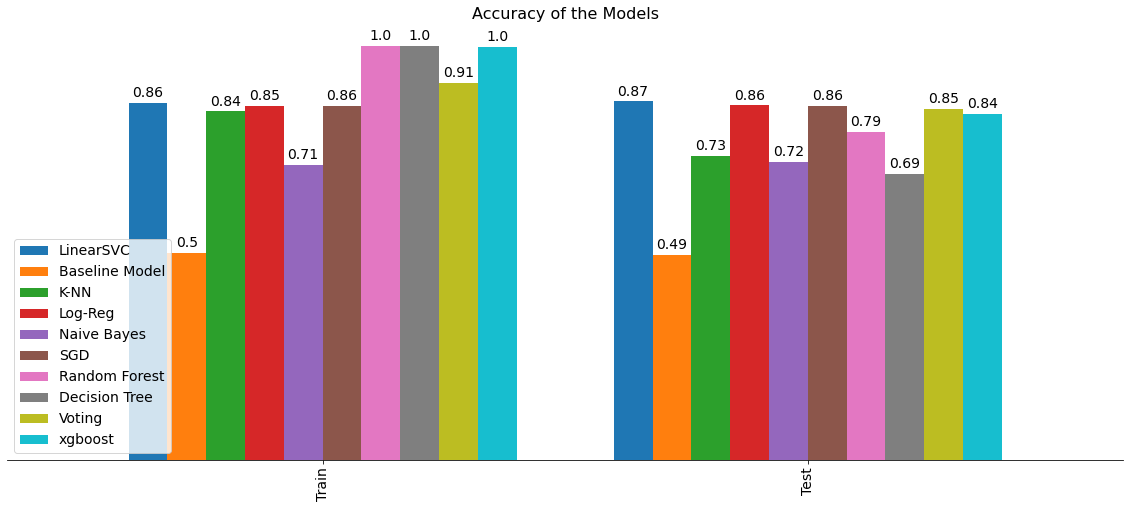

In [43]:
#,color=['#5cb85c','#5bc0de','#d9534f']

ax=scores_df.plot(kind='bar', figsize=(20, 8), width=0.8,fontsize=14) 
plt.legend(fontsize=14,loc="lower left")
plt.title("Accuracy of the Models",fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                                (p.get_x()+p.get_width()/2., p.get_height()),
                                ha='center',va='center',xytext=(0, 10),textcoords='offset points',fontsize=14) 
plt.show()

## Conclusion <a id= "6"></a>

## Authors:
### Daniel Molnar & Vanessa Koch

## References <a id= "7"></a>